# Palmer Penguins
***

This notebook contains my analysis of the palmer penguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three different islands in the Palmer Archipelago, Antarctica. 

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

The Palmer Penguins, artwork by @allison_horst






According to [AllisonHorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) "the goal of the palmerpenguins is to provide a great dataset for data exploration and visualization, as an alternative to iris". 

# TO DO

map of the islands if possible

variables section  - Diagram of the bill


Tidy up data types - currently a hot mess

Think about how to tidy up different variables I've assigned. Must be a cleaner and clearer way to do it.


Correlation part needs comments. 

Add research on the data set. Who uses it and why? Recent research?  Building on the work in literature (lol) and comparison to similiar work.

## Import Modules
***

Three different modules are required for this analysis:
* pandas
* numpy
* matplotlib.pyplot

Pandas is a python library for manipulating data and for performing data analysis. It can perform statistical calculations, find a correlations between two or more columns and it can be used to visualise data. The pandas package must first be loaded using the 'import' command to work with it. It is usually imported with the alias 'pd'. 

Numpy can perform a wide variety of mathematical calculations on arrays and matrices. All the elements in a numpy array should be of the same data type.

Matplotlib.pyplot is used to create plots

In [88]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib.pylab
import matplotlib.pylab as plt

# Import seaborn
import seaborn as sns

## Importing the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv). 

The data set used has the advantage in that it has been processed to remove extraneous information such as any NA in the data and the year that data was collected. The other minor difference is that male and female are capitalised in the Seaborn data set. 

In [89]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [90]:
# Have a look. Check that the file has loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Overview of the data set and the variables it contains.
***

In [73]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [74]:
# Counts the number of rows and columms in the data set.
df.shape

(344, 7)

In [75]:
# df.info() gives concise information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [91]:
# A count of the number of missing variables.
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Overiew of the data set

The data set has 344 rows and seven columns. Each row is an individual penguin and for each penguin there are seven possible variables.

The seven variables in the dataset are:
* species
* island
* bill_length in mm
* bill depth in mm
* flipper length in mm
* the body mass in g
* the sex of the penguin.


This artwork by Allison Horst nicely depicts the difference between the bill length and bill depth and how they were measured. In the original data set the word culmen was used in place of bill. 

![Bill length and bill depth](https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png)

The Palmer Penguins, artwork by @allison_horst

There are no variables missing from two columns, the species and island columns. The other columns have some missing data. The sex column has the most numbers of missing variables with 11. Bill length, bill depth, flipper length and body mass all have two pieces of missing data.

## Data types for the data set.

When a data set is loaded pandas automatically assigns what it thinks is the best data type for the data. Numerical data, are categorised as integers or floats. Non-numerical data are automatically assigned as objects or strings. 

Pandas data type names have a slightly different name compared to their python data types name, as shown in the table below.

| Python | Pandas |
|--------|--------|
| string| object|
|float|float64|
|integer|int64|
|bool|bool|
| - |category|
|-|datetime64|

In [92]:
# Check the data type of the variables. 
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

The bill length, bill depth, flipper length and body mass were given the data type float64 by pandas. Species, island and sex are all non-numerical data and were assigned the object data type.

Bill length and bill depth were measured in mm with the result recorded to one decimal place. These are floating point numbers and pandas has correctly assigned them to the data type of float64.

After reviewing the raw data file I noticed that while flipper length and body mass were measured in mm they were not measured to the same degree of accuracy as the bill measurements and were recorded as whole numbers i.e. integers. The correct data type for these two columns should be int64.

After completing the data camp course, [working with categorical data](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python) I realised that I needed to investigate the species, island and sex columns and not to assume that the object data type that was assigned to them was correct. If a column contains a limited and fixed number of possible non-numerical values it is possible to assign it to the pandas data type of category. There is no corresponding data type in python. For large data sets changing the data type to category could potentially result in significant memory savings.

First I need to check that these columns fulfill the criteria to fit the category data type by finding out the number of unique entries in these columns.

In [93]:
# Unique names in the species column.
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [94]:
# Unique values in the island column.
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [95]:
# Unique names in the sex column.
df["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)


Species contains three different objects, which are the penguin species names, Adelie, Gentoo and Chinstrap. 
The names of the three islands are Biscoe, Dream and Torgersen. The sex of the penguins are either male or female with 11 missing values as stated previously.

I believe these three columns should be in the data type of category as they all have finite, limited values.

In [96]:
# Change the data type to category
df[['species', 'island', 'sex']] = df[['species', 'island', 'sex']].astype('category')


For consistancy I would like the formatting of the sex column to be in line with the formatting of the species and island columns i.e title case.

In [97]:
# Changing the format of the sex column
df['sex'] = df['sex'].str.title()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


When I attempted to changed the data type of the flipper and body mass columns using the astype method, I ran into difficulty as pandas was not happy with the NaN 

Want to look at the rows with missing data. Luckily I can see from df.head() that rows 3 and rows 339 only have the island and species name recorded for those penguins. I will drop those two rows to see if i can then change the data type. Another way to deal with missing data is to fill the rows with the mean or median values but I have decided to simply drop them as 

In [ ]:
df.loc[3, 339].dropna()

In [83]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [16]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [17]:
df['body_mass_g'] = df['body_mass_g'].astype('int64')

C:\Users\Martin\AppData\Local\Temp\ipykernel_7336\61191879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body_mass_g'] = df['body_mass_g'].astype('int64')


In [18]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [19]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g             int64
sex                  category
dtype: object

In [20]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
# Renaming and reorganising the dataset so that the species column is now the index column. This will make slicing using loc() easier.
penguins = df.set_index("species")
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250,FEMALE
Adelie,Torgersen,36.7,19.3,193.0,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190.0,3650,MALE


In [22]:
adelie = penguins.loc[['Adelie']]
adelie.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [23]:
chinstrap = penguins.loc[['Chinstrap']]
chinstrap.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [24]:
gentoo = penguins.loc[['Gentoo']]
gentoo.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,119.000000,119.000000,119.000000,119.000000
mean,47.568067,14.996639,217.235294,5092.436975
std,3.106116,0.985998,6.585431,501.476154
min,40.900000,13.100000,203.000000,3950.000000
25%,45.350000,14.200000,212.000000,4700.000000
50%,47.400000,15.000000,216.000000,5050.000000
75%,49.600000,15.750000,221.500000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


EMpty rows NaN

## Bar chart of the penguin population on each island.

A bar chart can be used to examine the penguin population on each island.

In [25]:
# Unique variables in the island attribute
df["island"].unique()

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [26]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

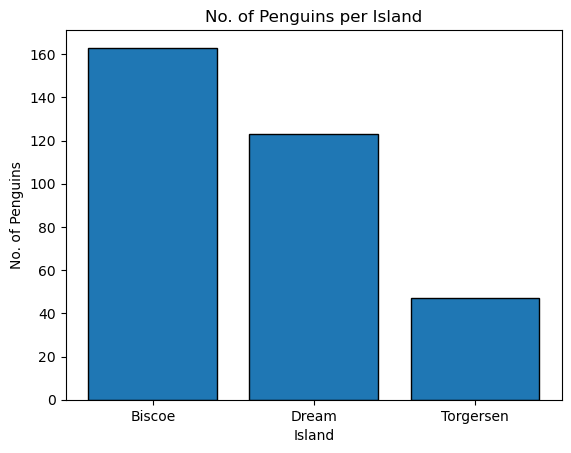

In [27]:
# Plotting a bar chart of the penguin population on each island

# Setting the x-axis to the islands
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])

# Setting the y-axis to the count of each penguin per island
ypoints = np.array(df['island'].value_counts())

plt.bar(xpoints, ypoints, edgecolor = "black")

plt.xlabel("Island")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")
plt.show()

### Investigating the penguin species that are present on each island. 

While the above bar chart is reasonable, it would be nice to get more information about the penguins and their relationship to the island. Some additional information that could be plotted to a bar chart is a breakdown of the penguin count by species on each island. 

To do this we need to know:
* the penguin species that are present on each island
* a count of the penguins by species for each island.

In [28]:
# Penguin species present on each island.
df.groupby('island')['species'].unique()

island
Biscoe       ['Adelie', 'Gentoo']
Categories (3, object): [...
Dream        ['Adelie', 'Chinstrap']
Categories (3, object)...
Torgersen    ['Adelie']
Categories (3, object): ['Adelie', ...
Name: species, dtype: object

In [29]:
# A count of the different penguin species on each island.  
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
           Chinstrap      0
Dream      Chinstrap     68
           Adelie        55
           Gentoo         0
Torgersen  Adelie        47
           Chinstrap      0
           Gentoo         0
Name: count, dtype: int64

The results of the count of the different species on each island can be visualised using a bar chart. After much trial and error, a [Countplot in Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html) appears to be the simplest method of making the required bar chart. https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=ml_lbp

Firstly, seaborn must be imported. 

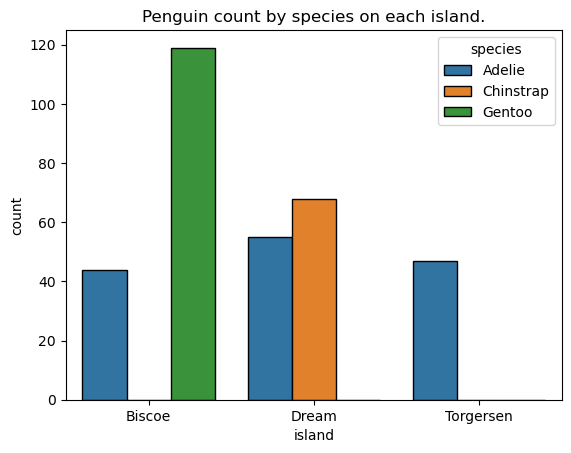

In [30]:
# A breakdown of the penguin population on each island by species. I would like if this was stacked by colour if possible
sns.countplot(df, x = 'island',
            hue = 'species',
            edgecolor = 'black'
            )
plt.title('Penguin count by species on each island.')
plt.show()

__Summary of the penguin population on each island.__

The three islands are Biscoe, Dream and Torgersen. Biscoe is the most populous island with 168 penguins. Torgersen is the least populous island with only 52 penguins of the penguins studied. 

Both Biscoe and Dream have two penguin species, with only one penguin species present on Torgersen. Adelie penguins were found on all three islands, with Chinstrap and Gentoo found on Dream and Torgersen respectively.

## Histogram of an appropriate variable
***
Task: Make a histogram using an appropriate variable. 

My chosen variable is flipper lengths. WHY?

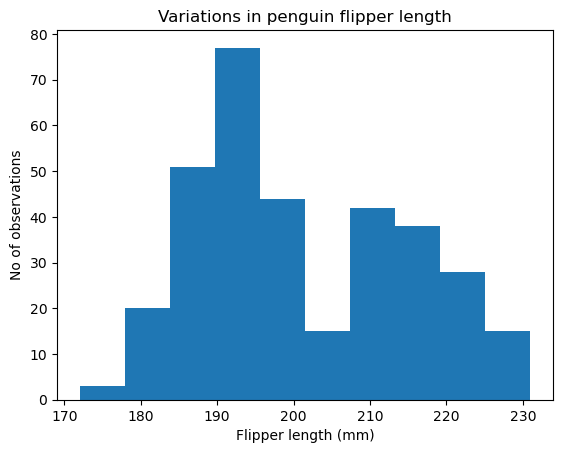

In [31]:
# Plot of the distribution of flipper length (mm)
plt.hist(np.array(df["flipper_length_mm"]))
plt.xlabel("Flipper length (mm)")
plt.ylabel("No of observations")
plt.title("Variations in penguin flipper length")
plt.show()

The histogram would be expected to have a normal curve distribution but as we can see it doesn't and has a very unusual shape. Further analysis is required to explain the shape of the histogram.

__Normal Distribution__ADD reference

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/320px-Standard_Normal_Distribution.png)




As there are three different penguin species, I will now analyse the flipper length for each species.

In [32]:
# Investigating the mean, standard deviation and median of the flipper length for the different penguin species.
df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median, min, max])

,mean,std,median,min,max
species,,,,,
Adelie,190.102740,6.521825,190.0,172.0,210.0
Chinstrap,195.823529,7.131894,196.0,178.0,212.0
Gentoo,217.235294,6.585431,216.0,203.0,231.0


In [33]:
# Same as above but using pivot_table # Investigating the mean, standard deviation and median of the penguin species
df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,190.102740,6.521825,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.235294,6.585431,216.0


The above table demonstrates that each of the penguin species have noticeably different flipper lengths. The Gentoo penguins have the largest flippers with the average flipper length of 217mm and a median value of 216mm. The Adelie penguins have the smallest flipper length of 189mm with a median of 190mm.

The bars on the right of the above histogram from approximately 208mm is the distribution of flipper lengths for the Gentoo penguin. The bars on the left are for the overlapping values of the Adelie and Chinstrap penguins.

An improved histogram is required to show the distribution of flipper lengths for the penguin species. 

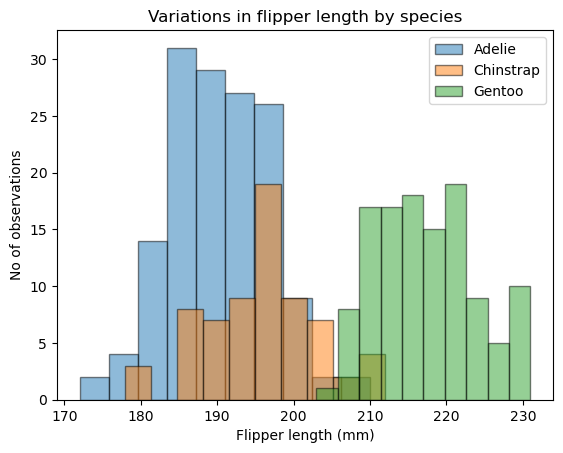

In [34]:
# Histogram of the variations in flipper length by species.

# This is my histogram for the task.

fig, ax = plt.subplots()
ax.hist(adelie['flipper_length_mm'], label = "Adelie", edgecolor = "black", alpha = 0.5)
ax.hist(chinstrap['flipper_length_mm'], label = "Chinstrap", edgecolor = "black", alpha = 0.5)
ax.hist(gentoo['flipper_length_mm'], label = "Gentoo", edgecolor = "black", alpha = 0.5)
ax.set_title("Variations in flipper length by species")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("No of observations")
ax.legend()
plt.show()

This histogram clearly demonstrates that each species has a distinct flipper size. It would be possible from flipper length to identify a penguin as a Gentoo penguin. It would be more difficult to classify the Adelie and the Chinstrap penguins by their flipper lengths alone as the values overlap.

# Project
***

Select two variables for the data set and provide an analysis of how correlated they are.

## Brainstorm

WHat two variables could I compare?

* Is flipper length or bill length/depth in proportion to the body mass
* Do heavier penguins have longer flippers or bill length?
* Bigger bills, bigger body mass? Bigger bills can eat more? 
* Compare male vs female within the chosen variables
* Some information on the sex of the penguin is missing for some penguins. Could I predict whether they are male or female based on the other traits. 
* Adelie penguins live on all three islands, are there any differences in flipper, bills, body mass? 

In [35]:
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'bill_depth_mm' : 'mean', 'body_mass_g' : 'mean'})

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g
species,,,,
Adelie,190.102740,38.823973,18.347260,3706.164384
Chinstrap,195.823529,48.833824,18.420588,3733.088235
Gentoo,217.235294,47.568067,14.996639,5092.436975


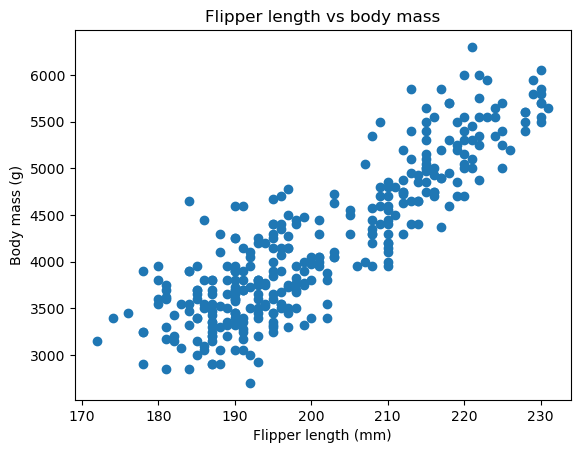

In [36]:
# Simple scatter plot to get started of flipper length (mm) vs body mass (g)
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.title('Flipper length vs body mass')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.show()

## Scatter plot by species

The COMMENT ON PLOT



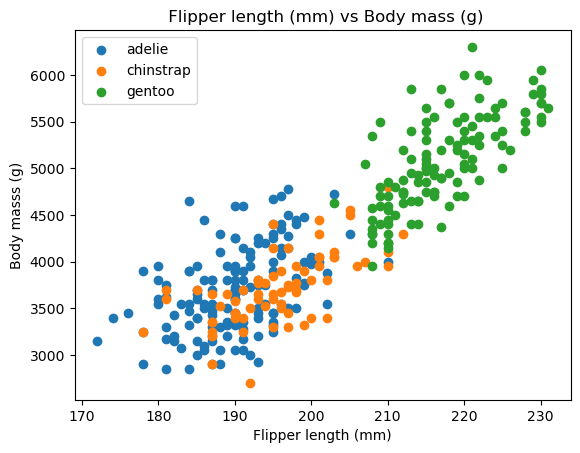

In [37]:
fig, ax = plt.subplots()

ax.scatter(adelie['flipper_length_mm'], adelie['body_mass_g'], label = 'adelie')
ax.scatter(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'], label = 'chinstrap')
ax.scatter(gentoo['flipper_length_mm'], gentoo['body_mass_g'], label = 'gentoo')
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body masss (g)')
ax.set_title(' Flipper length (mm) vs Body mass (g)')
ax.legend()
plt.show()

HWat is correlation?

How correlated are the flipper length and body mass? 

In [38]:
# Overall correlation between flipper length and body mass.
penguins['body_mass_g'].corr(penguins['flipper_length_mm'])

0.8729788985653611

Calculating the correlation between body mass and flipper length by species

In [39]:
# Correlation between flipper length and body mass for Adelie penguins.
adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

0.4648539302610766

In [40]:
# Correlation between flipper length and body mass for Chinstrap penguins.
chinstrap['body_mass_g'].corr(chinstrap['flipper_length_mm'])

0.6415594129316967

In [41]:
# Correlation between flipper length and body mass for Gentoo penguins.
gentoo['body_mass_g'].corr(gentoo['flipper_length_mm'])

0.7113052561445229

## Correlation between body mass and flipper length.

The results from a correlation are in the range of -1 to +1, with -1 indicating a strong negative correlation, 0 indicating no correlation and +1 is a strong positive correlationhttps://www.ncbi.[Common pitfalls in statistical analysis: The use of correlation techniques](nlm.nih.gov/pmc/articles/PMC5079093/).

When the overall correlation is calculated it appears that there is a strong poditive correlation between flipper length and body mass with a value of 0.87. However when the correlation is performed by penguin species that the true correlation is lower. Adelie penguins display a moderate correlation with a value of 0.47 and the Gentoo penguins have a 

element wise correlation https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

In [42]:
# Calculating the correlation between all the variables in the Adelie penguin. 
adelie_corr = adelie.drop(['island', 'sex'], axis = 1).corr()
adelie_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.385813,0.332274,0.544276
bill_depth_mm,0.385813,1.000000,0.310897,0.580156
flipper_length_mm,0.332274,0.310897,1.000000,0.464854
body_mass_g,0.544276,0.580156,0.464854,1.000000


Overall for the Adelie penguin there is a weak to moderate correlation between the different variables. The strongest correlation in the table is between bill depth and body mass at 0.58, with bill length and body mass closely behind it at 0.55. 

While we can read the above table, it is not very visual and it has to be carefully analysed. [Seaborn heatmaps](https://www.datacamp.com/tutorial/seaborn-heatmaps) are very useful tool to visualise numerical data. The data is organised in a grid by colour, with the colour indicating order of magnitude. It is much easier to identify relationships between the variables of interest. 

As heatmaps require numerical data, I dropped the columns for island and sex for all species data sets. To make comparsions between the species easier to identify, I adjusted the scale of the heatmap so that the same colour corresponded to the same order of magnitude. 

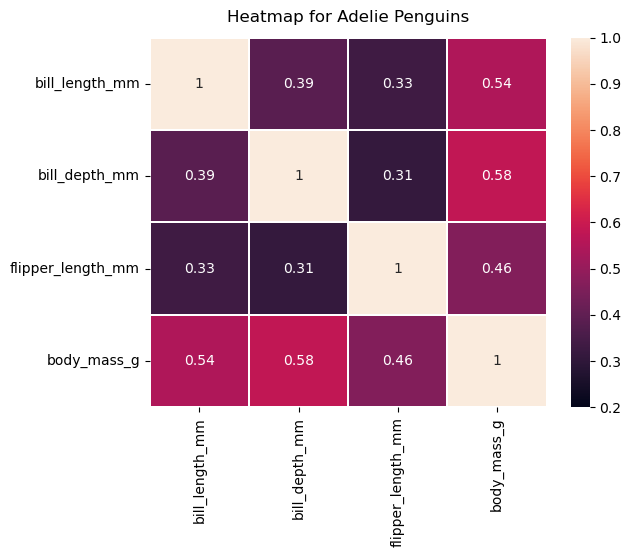

In [43]:
sns.heatmap(adelie.drop(['island', 'sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Adelie Penguins', y= 1.02)
plt.show()

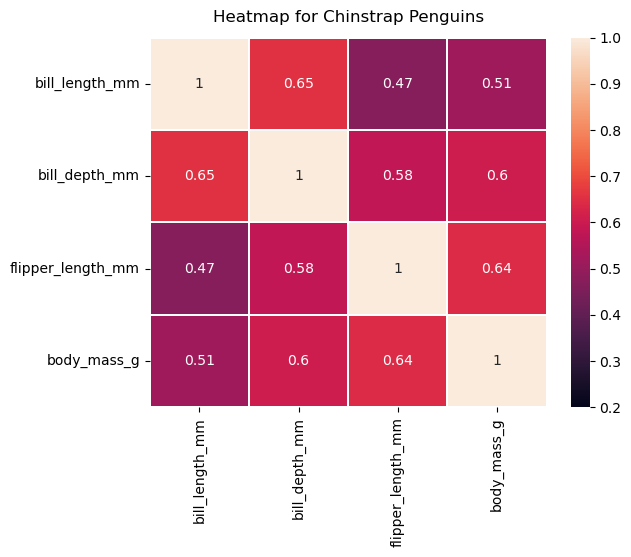

In [44]:
sns.heatmap(chinstrap.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Chinstrap Penguins', y= 1.02)
plt.show()

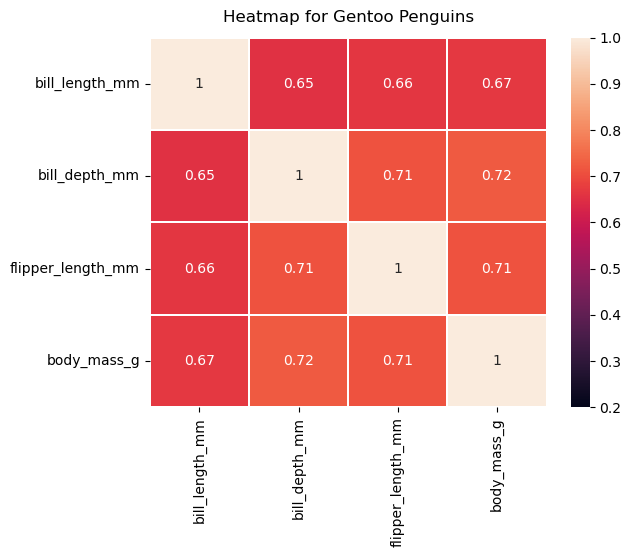

In [45]:
sns.heatmap(gentoo.drop(['island','sex'], axis = 1).corr(), annot = True, linewidths = 0.2, vmin = 0.2, vmax = 1)
plt.title('Heatmap for Gentoo Penguins', y= 1.02)
plt.show()

While a straight comparison appears to be a good correlation but when it is check by species. Poor correlation between body mass and flipper length for adelie penguins. Gentoo has a moderat( check correct term) correlation. 

Study of male vs female within the three different species. How would i plot it?

scatter plot by species male vs female
plot for each of 4 variables. 

In [46]:
male_adelie = adelie[(adelie['sex'] ==  'MALE')]
female_adelie = adelie[(adelie['sex'] ==  'FEMALE')]

male_chinstrap = chinstrap[(chinstrap['sex']) == 'MALE']
female_chinstrap = chinstrap[(chinstrap['sex']) == 'FEMALE']

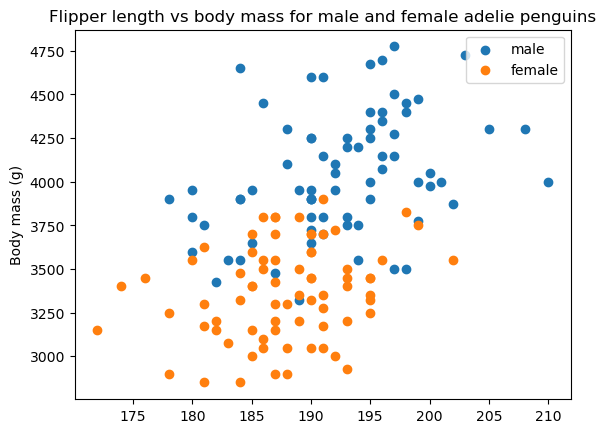

In [47]:
fig, ax = plt.subplots()

ax.scatter(male_adelie['flipper_length_mm'], male_adelie['body_mass_g'], label = 'male') 
ax.scatter(female_adelie['flipper_length_mm'], female_adelie['body_mass_g'], label = 'female')
ax.set_ylabel('Body mass (g)')
ax.set_title('Flipper length vs body mass for male and female adelie penguins')
ax.legend()
plt.show()


In [48]:
male_adelie['body_mass_g'].corr(male_adelie['flipper_length_mm'])

0.3604344747004836

In [49]:
female_adelie['body_mass_g'].corr(female_adelie['flipper_length_mm'])

0.26292964118829837

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


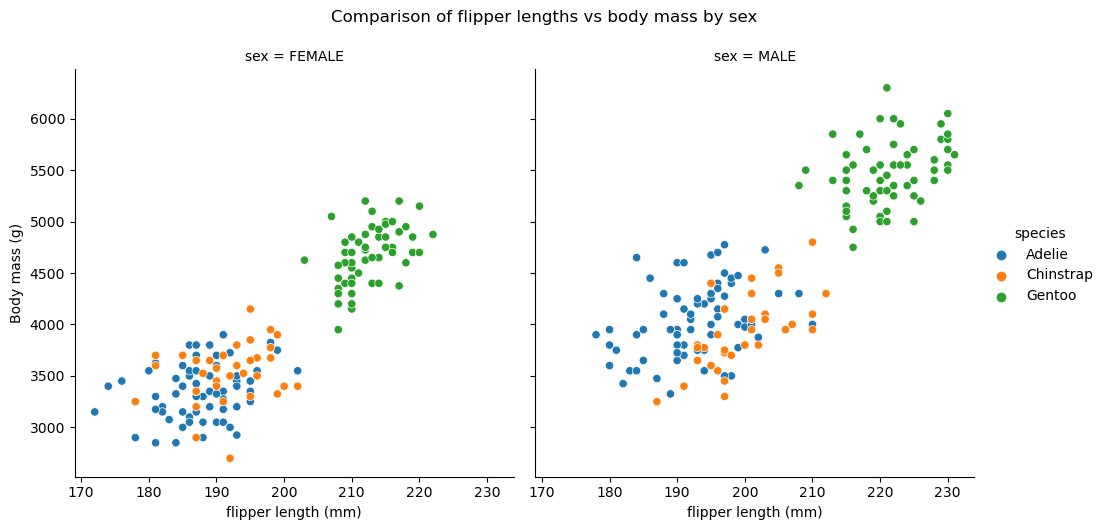

In [50]:
# Comparison of flipper lengths and body mass by species.
g = sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', col = 'sex', data = penguins)
g.fig.suptitle('Comparison of flipper lengths vs body mass by sex', y = 1.05)
g.set(xlabel = 'flipper length (mm)', ylabel = 'Body mass (g)')


plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


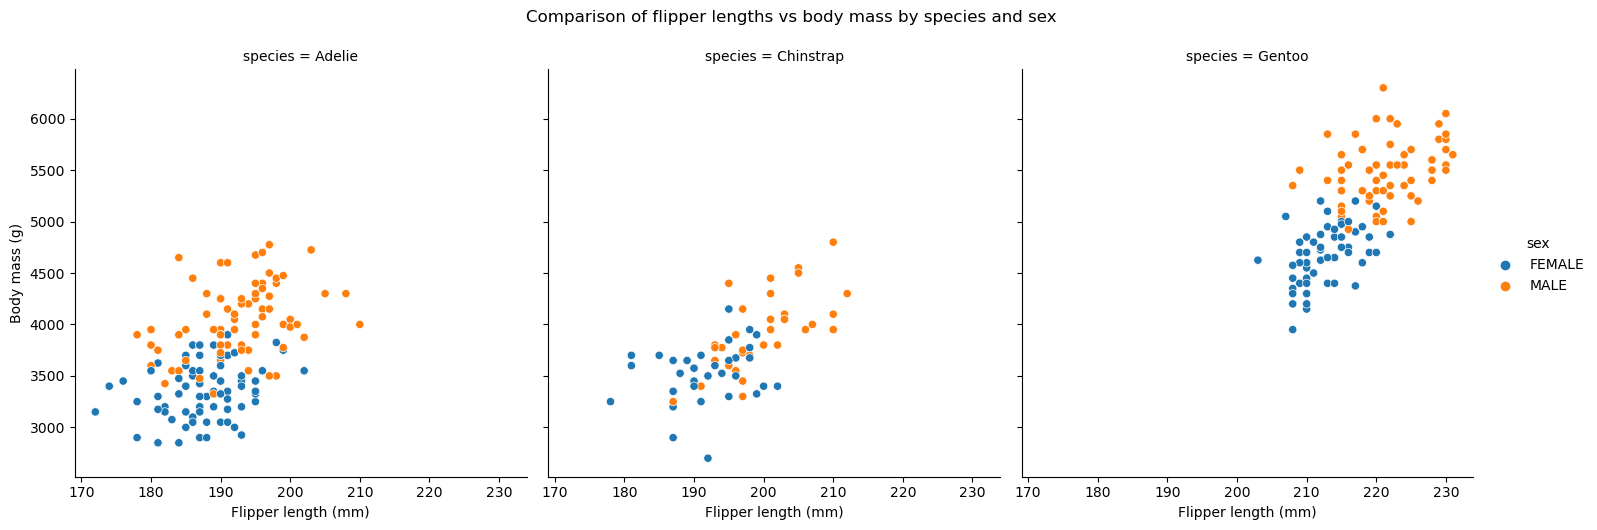

In [51]:
#import warnings
#warnings.filterwarnings('ignore')

g = sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', col = 'species', hue = 'sex', data = penguins)
g.fig.suptitle('Comparison of flipper lengths vs body mass by species and sex', y = 1.05)
g.set(xlabel = 'Flipper length (mm)', ylabel = 'Body mass (g)')
plt.show()

Any differences between the Adelie penguins on the three different islands?

## Missing data 

What data is missing in the adelie df?
Any duplicates?


In [52]:
adelie.isnull().sum()


island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [53]:
adelie.duplicated().sum()

0

In [54]:
adelie_no_na = adelie.dropna()

In [55]:
adelie_no_na['body_mass_g'].corr(adelie_no_na['flipper_length_mm'])

0.4648539302610766

In [56]:
adelie_no_na.groupby('island')['body_mass_g'].mean().std()

4.4946847528291505

In [57]:
adelie.groupby('island')['body_mass_g'].mean().std()

4.4946847528291505

** Investigating the Penguin Species.

In [58]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


Gentoo penguins, missing sex data. Can I tell if guess(?, need better word, if they are male or female.)

1st get the missing rows.


In [59]:
gentoo_missing = gentoo[~gentoo['sex'].isin(['MALE', 'FEMALE'])]
gentoo_missing


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,


In [60]:
df.groupby('island')['body_mass_g'].mean()


island
Biscoe       4719.171779
Dream        3718.902439
Torgersen    3708.510638
Name: body_mass_g, dtype: float64

In [61]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

In [62]:
# Number and sex of penguins
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [63]:
# Are male penguins heavier than female penguins?

df.groupby('sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

In [64]:
df.groupby('species')['flipper_length_mm'].mean()


species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64

In [65]:
# Same as above but using pivot_table

df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,190.102740,6.521825,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.235294,6.585431,216.0


### References

Datacamp [Introduction to Data Visualization with Matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib)

Datacamp [Data Manipulation with Pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

Datacamp [Introduction to Data Visualization with Seaborn](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)


## End

***